In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 1. 회귀 (Regression)
#### 1-1 케라스로 선형회귀 나타내기

In [2]:
# 선형회귀를 위한 인위 데이터 만들기
x = np.linspace(-1, 1, 9)
y = 4 * x + 2 + 0.5 * np.random.randn(len(x))

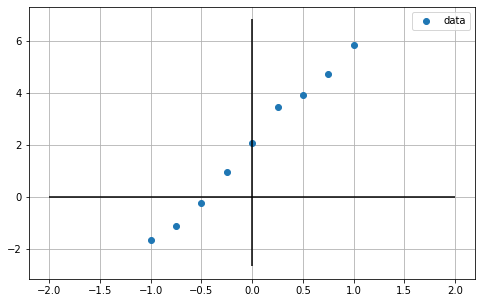

In [3]:
plt.figure(figsize = (8, 5))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

---

**케라스로 딥러닝 만드는 세 가지 단계**
1. 모델 정의
1. 모델 컴파일
1. 모델 훈련

**하나하나 알아보기**

모델 정의
- Sequential 인지? Functional 인지?
  - Sequential : 모델을 쌓은 순서대로 인풋이 흘러감
  - Functional : 입력값이 중간에 나뉘어지거나 합쳐지는 등의 과정이 있을 때 사용(고급 스킬)
- 레이어 쌓기 : `model.add()`로 원하는 레이어를 쌓아올림

모델 컴파일
  - 손실 함수 ex) binary_crossentropy, mean-squared-error, mean-absolute-error
  - 최적화 알고리즘, ex) Adam, SGD, RMSprop
  - 평가지표, ex) accuracy, mean-absolute-error

모델 학습
  - 데이터
  - 에폭 횟수
  - 배치 사이즈
  - 등등

In [4]:
###############################################################
# 케라스로 선형회귀 구현하기                                  #
###############################################################
# 모델 정의
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

# 모델 컴파일
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

# 모델 훈련
model.fit(x, y, epochs = 500, verbose = 0)
###############################################################
#                                                             #
###############################################################

2023-01-27 19:47:06.771571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


**훈련시킨 모델에 새로운 입력값을 넣었을 때 어떤 예측 값을 내는지 확인하기**<br/>
새로운 입력값 : -1에서 1까지 50등분

In [5]:
x_test = np.linspace(-1, 1, 50)
y_pred = model.predict(x_test)

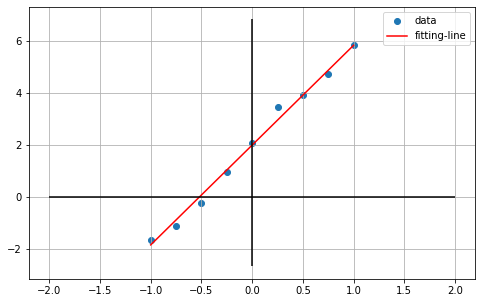

In [6]:
plt.figure(figsize = (8, 5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'r-', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

#### 1-2. 선형회귀로 사인그래프를 나타낼 수 있을까?

In [7]:
# 사인그래프 만들기
x = np.linspace(-1, 1, 20)
y = np.sin(np.pi * x)

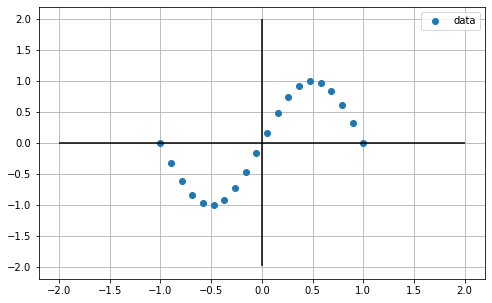

In [8]:
plt.figure(figsize = (8,5))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

In [9]:
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])

model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)

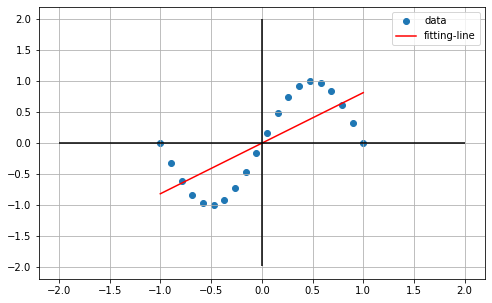

In [10]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'r-', label = 'fitting-line')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

In [11]:
model = Sequential()
###############################################################
# 아래에 모델을 쌓아서 사인 그래프를 적합하시오.                 #
# 첫 번째 레이어의 10 변경 가능합니다.                          #
# 단, 마지막에 model.add(Dense(1))이 있어야 합니다.             #
###############################################################
model.add(Dense(256, activation = 'relu', input_shape = (1,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1))
###############################################################
#                                                             #
###############################################################
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])
model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)

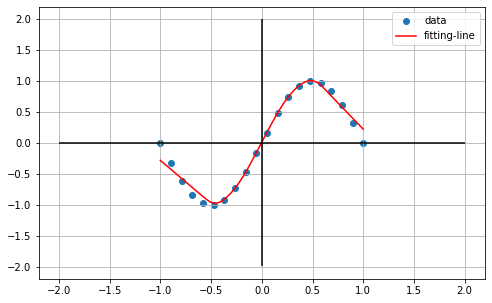

In [12]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'r-', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

#### (참고) weight 초기화의 중요성

In [13]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (1,)))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mean_squared_error'])

model.fit(x,y, epochs = 500, verbose = 0, batch_size = 9)

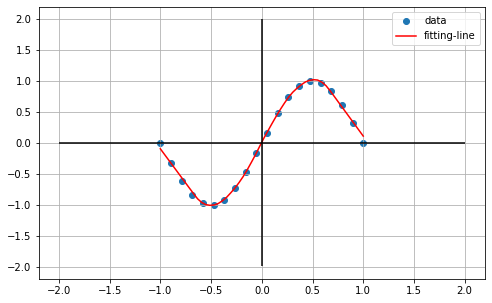

In [14]:
x_test = np.linspace(-1,1,50)
y_pred = model.predict(x_test)

plt.figure(figsize = (8,5))
# 데이터 그리기
plt.scatter(x, y, label = 'data')
plt.plot(x_test, y_pred, 'r-', label = 'fitting-line')


# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

### 2. 분류 (Classification)
#### 2-1 케라스로 로지스틱회귀 나타내기

In [15]:
x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)

X = []
for i in x:
    for j in y:
        if i+j <= 0:
            X.append([i, j, 0])
        else:
            X.append([i, j, 1])
X = np.array(X)

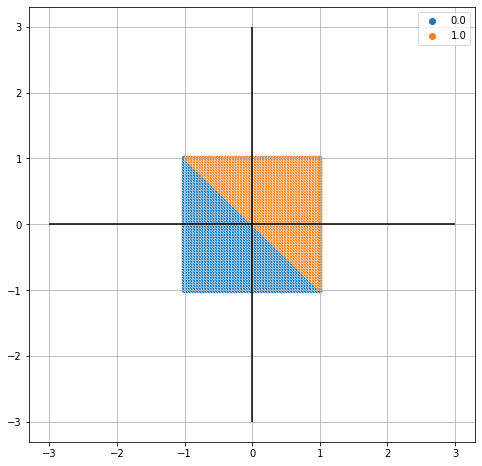

In [16]:
plt.figure(figsize = (8,8))

# 데이터 그리기
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])

# x축 y축 그리기
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.grid()

plt.show()

In [17]:
###############################################################
# 케라스로 로지스틱회귀 구현하기               ]              #
###############################################################
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_shape = (2,)))
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])
model.fit(X[:,[0,1]],X[:,2], epochs = 30, verbose = 0, batch_size = 8, validation_split = 0.2)
###############################################################
#                                                             #
###############################################################

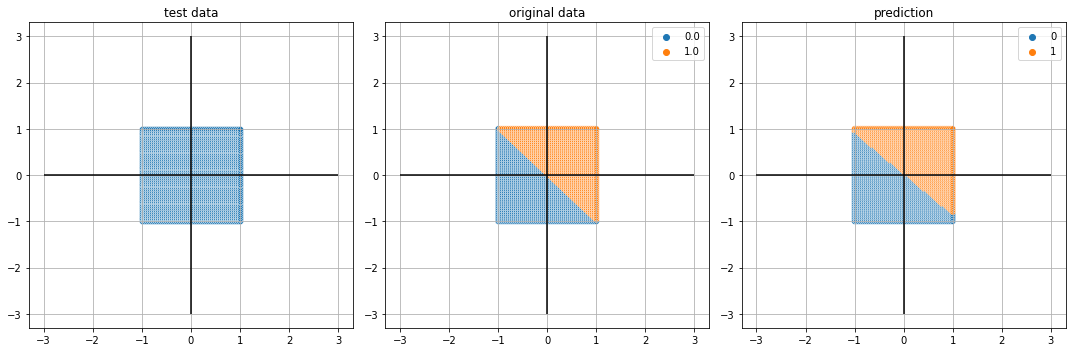

In [18]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
    for j in y:
        x_test.append([i,j])
x_test = np.array(x_test)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()

#### 2-2 로지스틱회귀로 도넛모양을 나타낼 수 있을까?

In [19]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X = []
for i in x:
    for j in y:
        if i**2 + j**2 <= 1:
            X.append([i,j,0])
        elif i**2 + j**2 <= 4:
            X.append([i,j,1])

X = np.array(X)

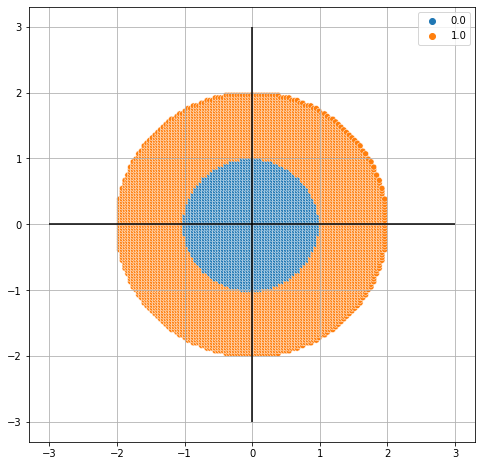

In [20]:
plt.figure(figsize = (8,8))

# 데이터 그리기
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])

# x축 y축 그리기
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.grid()

plt.show()

In [21]:
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_shape = (2,)))
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])
model.fit(X[:,[0,1]],X[:,2], epochs = 10, verbose = 1, batch_size = 8, validation_split = 0.2)

Epoch 1/10
767/767 [==============================] - 1s 1ms/step - loss: 0.6478 - acc: 0.6141 - val_loss: 1.3036 - val_acc: 0.0052
Epoch 2/10
767/767 [==============================] - 1s 973us/step - loss: 0.5785 - acc: 0.6293 - val_loss: 1.1962 - val_acc: 0.0052
Epoch 3/10
767/767 [==============================] - 1s 998us/step - loss: 0.5758 - acc: 0.6321 - val_loss: 1.1507 - val_acc: 0.0052
Epoch 4/10
767/767 [==============================] - 1s 996us/step - loss: 0.5755 - acc: 0.6327 - val_loss: 1.1205 - val_acc: 0.0052
Epoch 5/10
767/767 [==============================] - 1s 989us/step - loss: 0.5755 - acc: 0.6348 - val_loss: 1.1078 - val_acc: 0.0052
Epoch 6/10
767/767 [==============================] - 1s 964us/step - loss: 0.5755 - acc: 0.6348 - val_loss: 1.1004 - val_acc: 0.0052
Epoch 7/10
767/767 [==============================] - 1s 975us/step - loss: 0.5755 - acc: 0.6350 - val_loss: 1.1017 - val_acc: 0.0052
Epoch 8/10
767/767 [==============================] - 1s 983us/s

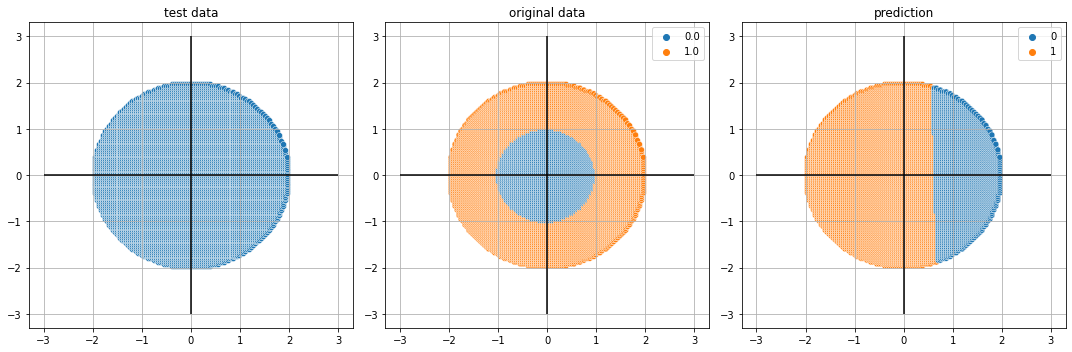

In [22]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
    for j in y:
        if i**2 + j**2 <= 4:
            x_test.append([i,j])
x_test = np.array(x_test)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()

In [23]:
model = Sequential()
###############################################################
# 아래에 모델을 쌓아서 도넛 모양을 적합하시오.                   #
# 첫 번째 레이어의 10 변경 가능합니다.                          #
# 단, 마지막에 model.add(Dense(1, activation = 'sigmoid'))     #
###############################################################
model.add(Dense(256, activation = 'relu', input_shape = (2,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
###############################################################
#                                                             #
###############################################################

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])
model.fit(X[:,[0,1]],X[:,2], epochs = 10, verbose = 1, batch_size = 8, validation_split = 0.2)

Epoch 1/10
767/767 [==============================] - 1s 1ms/step - loss: 0.4882 - acc: 0.7168 - val_loss: 0.5214 - val_acc: 0.8670
Epoch 2/10
767/767 [==============================] - 1s 1ms/step - loss: 0.2854 - acc: 0.8893 - val_loss: 0.4711 - val_acc: 0.7555
Epoch 3/10
767/767 [==============================] - 1s 1ms/step - loss: 0.1715 - acc: 0.9527 - val_loss: 0.3096 - val_acc: 0.8435
Epoch 4/10
767/767 [==============================] - 1s 1ms/step - loss: 0.1128 - acc: 0.9728 - val_loss: 0.2129 - val_acc: 0.8924
Epoch 5/10
767/767 [==============================] - 1s 1ms/step - loss: 0.0835 - acc: 0.9832 - val_loss: 0.1337 - val_acc: 0.9316
Epoch 6/10
767/767 [==============================] - 1s 1ms/step - loss: 0.0675 - acc: 0.9847 - val_loss: 0.0895 - val_acc: 0.9531
Epoch 7/10
767/767 [==============================] - 1s 1ms/step - loss: 0.0571 - acc: 0.9894 - val_loss: 0.0683 - val_acc: 0.9654
Epoch 8/10
767/767 [==============================] - 1s 1ms/step - loss: 0.

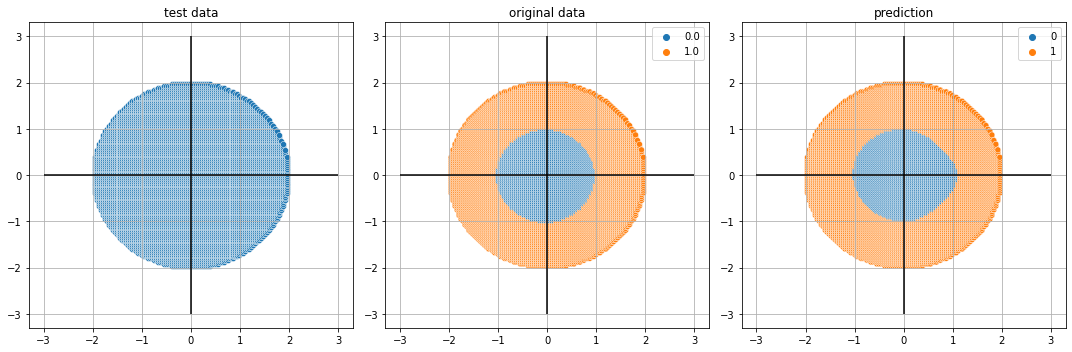

In [24]:
#######################################
# 테스트 데이터 만들기 & 예측하기
#######################################
x_test = []
for i in x:
    for j in y:
        if i**2 + j**2 <= 4:
            x_test.append([i,j])
x_test = np.array(x_test)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

#######################################
# 그림그리기
#######################################
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1])
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("test data")
plt.grid()

plt.subplot(132)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = X[:,2])
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("original data")
plt.grid()

plt.subplot(133)
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = y_pred.reshape(-1))
plt.vlines(x = 0,  ymin = -3, ymax = 3, color='k')
plt.hlines(y = 0,  xmin = -3, xmax = 3, color='k')
plt.title("prediction")
plt.grid()

plt.tight_layout()

plt.show()